In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#file Path
file_path = '/content/drive/MyDrive/Defi/user-wallet-transactions.json'
file_path

'/content/drive/MyDrive/Defi/user-wallet-transactions.json'

In [5]:
#Load Json File
with open(file_path,'r') as f:
  data = json.load(f)

In [6]:
#convert json (list of dictionary) into DataFrame
df=pd.DataFrame(data)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.head(2)

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6d2e66e6b0e3b2e8d4190,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6d2e66e6b0e3b2e8d4190_Deposit,1629178166,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'assetSymbol': 'USDC', 'assetPriceUSD': '0.9938318274296357543568636362026045', 'poolId': '0x2791bca1f2de4661ed88a30c99a7a9449aa84174', 'userId': '0x00000000001accfa9cef68cf5371a23025b6d4b6'}",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d92b0e1512a81b1129e3f,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d92b0e1512a81b1129e3f_Deposit,1621525013,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000000000', 'assetSymbol': 'WMATIC', 'assetPriceUSD': '1.970306761113742502077627085754506', 'poolId': '0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270', 'userId': '0x000000000051d07a4fb3bd10121a343d85818da6'}",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   _id          100000 non-null  object
 1   userWallet   100000 non-null  object
 2   network      100000 non-null  object
 3   protocol     100000 non-null  object
 4   txHash       100000 non-null  object
 5   logId        100000 non-null  object
 6   timestamp    100000 non-null  int64 
 7   blockNumber  100000 non-null  int64 
 8   action       100000 non-null  object
 9   actionData   100000 non-null  object
 10  __v          100000 non-null  int64 
 11  createdAt    100000 non-null  object
 12  updatedAt    100000 non-null  object
dtypes: int64(3), object(10)
memory usage: 9.9+ MB


In [8]:
# Check for missing/null values
df.isnull().sum()  # no Null values are in the columns

,0
_id,0
userWallet,0
network,0
protocol,0
txHash,0
logId,0
timestamp,0
blockNumber,0
action,0
actionData,0


In [9]:
# Check unique action types (e.g., deposit, borrow, etc.)
df['action'].value_counts()

,count
action,
deposit,37808
redeemunderlying,32305
borrow,17086
repay,12553
liquidationcall,248


In [10]:
# Extract Useful Fields from actionData
action_df=pd.json_normalize(df['actionData'])
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
action_df.head()

,type,amount,assetSymbol,assetPriceUSD,poolId,userId,toId,borrowRateMode,borrowRate,variableTokenDebt,stableTokenDebt,callerId,useATokens,repayerId,liquidatorId,collateralAmount,collateralAssetPriceUSD,principalAmount,borrowAssetPriceUSD,collateralReserveId,collateralReserveSymbol,principalReserveId,principalReserveSymbol
0,Deposit,2000000000,USDC,0.9938318274296357543568636362026045,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,0x00000000001accfa9cef68cf5371a23025b6d4b6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Deposit,145000000000000000000,WMATIC,1.970306761113742502077627085754506,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,0x000000000051d07a4fb3bd10121a343d85818da6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Deposit,1000000000000000,WMATIC,0.9223772540040778087468127454060907,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,0x000000000096026fb41fc39f9875d164bd82e2dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deposit,4000000000000000,WMATIC,1.057483342538527030870377652200841,0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270,0x000000000096026fb41fc39f9875d164bd82e2dc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RedeemUnderlying,501548,USDC,1.00212969929885247748335868168494,0x2791bca1f2de4661ed88a30c99a7a9449aa84174,0x7f90122bf0700f9e7e1f688fe926940e8839f353,0x0000000000e189dd664b9ab08a33c4839953852c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
action_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   type                     100000 non-null  object 
 1   amount                   100000 non-null  object 
 2   assetSymbol              100000 non-null  object 
 3   assetPriceUSD            100000 non-null  object 
 4   poolId                   100000 non-null  object 
 5   userId                   100000 non-null  object 
 6   toId                     32305 non-null   object 
 7   borrowRateMode           0 non-null       float64
 8   borrowRate               17086 non-null   object 
 9   variableTokenDebt        17086 non-null   object 
 10  stableTokenDebt          17086 non-null   object 
 11  callerId                 17086 non-null   object 
 12  useATokens               12553 non-null   object 
 13  repayerId                12553 non-null   object 
 14  liqui

In [12]:
action_df.isnull().sum()

,0
type,0
amount,0
assetSymbol,0
assetPriceUSD,0
poolId,0
userId,0
toId,67695
borrowRateMode,100000
borrowRate,82914
variableTokenDebt,82914


In [13]:
#keeping only impt columns
important_cols = [
    'amount', 'assetSymbol', 'assetPriceUSD',
    'borrowRate', 'collateralAmount', 'principalAmount'
]
action_df_cleaned=action_df[important_cols]
action_df_cleaned

,amount,assetSymbol,assetPriceUSD,borrowRate,collateralAmount,principalAmount
0,2000000000,USDC,0.9938318274296357543568636362026045,NaN,NaN,NaN
1,145000000000000000000,WMATIC,1.970306761113742502077627085754506,NaN,NaN,NaN
2,1000000000000000,WMATIC,0.9223772540040778087468127454060907,NaN,NaN,NaN
3,4000000000000000,WMATIC,1.057483342538527030870377652200841,NaN,NaN,NaN
4,501548,USDC,1.00212969929885247748335868168494,NaN,NaN,NaN
...,...,...,...,...,...,...
99995,19724448273,USDT,1.002190552454766597115369809173134,NaN,NaN,NaN
99996,2000000000000000000,WETH,2342.039086000003558177674738167022,NaN,NaN,NaN
99997,1994013911857945550,WETH,2342.039086000003558177674738167022,NaN,NaN,NaN
99998,4000000000,USDC,1.00190090059994152215282747624047,27887841015204532581235931,NaN,NaN


In [14]:
# Merge cleaned action data into original dataframe
df=pd.concat([df, action_df_cleaned], axis=1)
df

,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt,amount,assetSymbol,assetPriceUSD,borrowRate,collateralAmount,principalAmount
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6d2e66e6b0e3b2e8d4190,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6d2e66e6b0e3b2e8d4190_Deposit,1629178166,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'assetSymbol': 'USDC', 'assetPriceUSD': '0.9938318274296357543568636362026045', 'poolId': '0x2791bca1f2de4661ed88a30c99a7a9449aa84174', 'userId': '0x00000000001accfa9cef68cf5371a23025b6d4b6'}",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'},2000000000,USDC,0.9938318274296357543568636362026045,NaN,NaN,NaN
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d92b0e1512a81b1129e3f,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d92b0e1512a81b1129e3f_Deposit,1621525013,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000000000', 'assetSymbol': 'WMATIC', 'assetPriceUSD': '1.970306761113742502077627085754506', 'poolId': '0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270', 'userId': '0x000000000051d07a4fb3bd10121a343d85818da6'}",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'},145000000000000000000,WMATIC,1.970306761113742502077627085754506,NaN,NaN,NaN
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baadf59c3b29099fb138132,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baadf59c3b29099fb138132_Deposit,1627118913,1627118913,deposit,"{'type': 'Deposit', 'amount': '1000000000000000', 'assetSymbol': 'WMATIC', 'assetPriceUSD': '0.9223772540040778087468127454060907', 'poolId': '0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270', 'userId': '0x000000000096026fb41fc39f9875d164bd82e2dc'}",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'},1000000000000000,WMATIC,0.9223772540040778087468127454060907,NaN,NaN,NaN
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee7295428fe8bd8aa18111dec,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee7295428fe8bd8aa18111dec_Deposit,1627773318,1627773318,deposit,"{'type': 'Deposit', 'amount': '4000000000000000', 'assetSymbol': 'WMATIC', 'assetPriceUSD': '1.057483342538527030870377652200841', 'poolId': '0x0d500b1d8e8ef31e21c99d1db9a6444d3adf1270', 'userId': '0x000000000096026fb41fc39f9875d164bd82e2dc'}",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'},4000000000000000,WMATIC,1.057483342538527030870377652200841,NaN,NaN,NaN
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de695c78e3192dd7cc6cbbb2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de695c78e3192dd7cc6cbbb2_RedeemUnderlying,1618845907,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548', 'assetSymbol': 'USDC', 'assetPriceUSD': '1.00212969929885247748335868168494', 'poolId': '0x2791bca1f2de4661ed88a30c99a7a9449aa84174', 'userId': '0x7f90122bf0700f9e7e1f688fe926940e8839f353', 'toId': '0x0000000000e189dd664b9ab08a33c4839953852c'}",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'},501548,USDC,1.00212969929885247748335868168494,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,{'$oid': '681c85447b724ae36a6df5c9'},0x06192f889f17bf2aff238d08d8c26cbcfcc7b45a,polygon,aave_v2,0x7c94fbaff37d45ed220e4eeac4e7f14f3476af596d12edcea3cdf671504c7e2e,0x7c94fbaff37d45ed220e4eeac4e7f14f3476af596d12edcea3cdf671504c7e2e_Repay,1623421245,1623421245,repay,"{'type': 'Repay', 'amount': '19724448273', 'assetSymbol': 'USDT', 'assetPriceUSD': '

In [15]:
# Drop Unnecessary Columns
df.drop(columns=[
    '_id', 'actionData', 'createdAt', 'updatedAt', 'logId',
    'txHash', 'network', 'protocol', '__v'
], inplace=True)


In [15]:
df.head()

,userWallet,timestamp,blockNumber,action,amount,assetSymbol,assetPriceUSD,borrowRate,collateralAmount,principalAmount
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1629178166,1629178166,deposit,2000000000,USDC,0.9938318274296357543568636362026045,NaN,NaN,NaN
1,0x000000000051d07a4fb3bd10121a343d85818da6,1621525013,1621525013,deposit,145000000000000000000,WMATIC,1.970306761113742502077627085754506,NaN,NaN,NaN
2,0x000000000096026fb41fc39f9875d164bd82e2dc,1627118913,1627118913,deposit,1000000000000000,WMATIC,0.9223772540040778087468127454060907,NaN,NaN,NaN
3,0x000000000096026fb41fc39f9875d164bd82e2dc,1627773318,1627773318,deposit,4000000000000000,WMATIC,1.057483342538527030870377652200841,NaN,NaN,NaN
4,0x0000000000e189dd664b9ab08a33c4839953852c,1618845907,1618845907,redeemunderlying,501548,USDC,1.00212969929885247748335868168494,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   userWallet        100000 non-null  object
 1   timestamp         100000 non-null  int64 
 2   blockNumber       100000 non-null  int64 
 3   action            100000 non-null  object
 4   amount            100000 non-null  object
 5   assetSymbol       100000 non-null  object
 6   assetPriceUSD     100000 non-null  object
 7   borrowRate        17086 non-null   object
 8   collateralAmount  248 non-null     object
 9   principalAmount   248 non-null     object
dtypes: int64(2), object(8)
memory usage: 7.6+ MB


In [17]:
#convert the timestamp into Date
df['timestamp']=pd.to_datetime(df['timestamp'],unit='s')


In [18]:
# Convert numeric fields
df['amount']=pd.to_numeric(df['amount'],errors='coerce')  #errors='coerce' replaces any values that cannot be converted to a number with NaN (Not a Number).
df['amount']
# df['assetPriceUSD']=pd.to_numeric(df['assetPriceUSD'],errors='coerce')

,amount
0,2.000000e+09
1,1.450000e+20
2,1.000000e+15
3,4.000000e+15
4,5.015480e+05
...,...
99995,1.972445e+10
99996,2.000000e+18
99997,1.994014e+18
99998,4.000000e+09


In [19]:
df['amount'] = df['amount'].astype(float)
df['amount']

,amount
0,2.000000e+09
1,1.450000e+20
2,1.000000e+15
3,4.000000e+15
4,5.015480e+05
...,...
99995,1.972445e+10
99996,2.000000e+18
99997,1.994014e+18
99998,4.000000e+09


In [20]:
df['assetPriceUSD'] = df['assetPriceUSD'].astype(float)
df['assetPriceUSD']

,assetPriceUSD
0,0.993832
1,1.970307
2,0.922377
3,1.057483
4,1.002130
...,...
99995,1.002191
99996,2342.039086
99997,2342.039086
99998,1.001901


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   userWallet        100000 non-null  object        
 1   timestamp         100000 non-null  datetime64[ns]
 2   blockNumber       100000 non-null  int64         
 3   action            100000 non-null  object        
 4   amount            100000 non-null  float64       
 5   assetSymbol       100000 non-null  object        
 6   assetPriceUSD     100000 non-null  float64       
 7   borrowRate        17086 non-null   object        
 8   collateralAmount  248 non-null     object        
 9   principalAmount   248 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 7.6+ MB


In [42]:
# to convert any crypto token amount into its real-world USD value is:
# USD Value = amount * assetPriceUSD  this will give the same units as usd dollars to interpret
#calculate used value
df['usd_value']=df['amount']*df['assetPriceUSD']
# Format the display of the 'usd_value' column
pd.options.display.float_format = '{:.6f}'.format
display(df['usd_value'])

,usd_value
0,1987663654.859272
1,285694480361492676608.000000
2,922377254004077.750000
3,4229933370154108.000000
4,502616.146424
...,...
99995,19767655711.583336
99996,4684078172000006701056.000000
99997,4670058519599073198080.000000
99998,4007603602.399766


In [22]:
# display(df[['usd_value']].style.format('{:.6f}'))
df['usd_value']=df['amount']*df['assetPriceUSD']


This will display *only* the `usd_value` column (you can include other columns in the list `[['usd_value', 'another_column']]` if you want) and format the numbers to 6 decimal places. The original DataFrame `df` remains unchanged.

In [23]:
df.head()

,userWallet,timestamp,blockNumber,action,amount,assetSymbol,assetPriceUSD,borrowRate,collateralAmount,principalAmount,usd_value
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,2021-08-17 05:29:26,1629178166,deposit,2.000000e+09,USDC,0.993832,NaN,NaN,NaN,1.987664e+09
1,0x000000000051d07a4fb3bd10121a343d85818da6,2021-05-20 15:36:53,1621525013,deposit,1.450000e+20,WMATIC,1.970307,NaN,NaN,NaN,2.856945e+20
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2021-07-24 09:28:33,1627118913,deposit,1.000000e+15,WMATIC,0.922377,NaN,NaN,NaN,9.223773e+14
3,0x000000000096026fb41fc39f9875d164bd82e2dc,2021-07-31 23:15:18,1627773318,deposit,4.000000e+15,WMATIC,1.057483,NaN,NaN,NaN,4.229933e+15
4,0x0000000000e189dd664b9ab08a33c4839953852c,2021-04-19 15:25:07,1618845907,redeemunderlying,5.015480e+05,USDC,1.002130,NaN,NaN,NaN,5.026161e+05


In [24]:
df[['amount', 'assetPriceUSD', 'usd_value','timestamp']].head()


,amount,assetPriceUSD,usd_value,timestamp
0,2.000000e+09,0.993832,1.987664e+09,2021-08-17 05:29:26
1,1.450000e+20,1.970307,2.856945e+20,2021-05-20 15:36:53
2,1.000000e+15,0.922377,9.223773e+14,2021-07-24 09:28:33
3,4.000000e+15,1.057483,4.229933e+15,2021-07-31 23:15:18
4,5.015480e+05,1.002130,5.026161e+05,2021-04-19 15:25:07


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   userWallet        100000 non-null  object        
 1   timestamp         100000 non-null  datetime64[ns]
 2   blockNumber       100000 non-null  int64         
 3   action            100000 non-null  object        
 4   amount            100000 non-null  float64       
 5   assetSymbol       100000 non-null  object        
 6   assetPriceUSD     100000 non-null  float64       
 7   borrowRate        17086 non-null   object        
 8   collateralAmount  248 non-null     object        
 9   principalAmount   248 non-null     object        
 10  usd_value         100000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 8.4+ MB


In [79]:
# Extract Time-Based Columns
df['date'] = df['timestamp'].dt.date
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek  # 0 = Monday, 6 = Sunday


In [80]:
print(df['date'])
print(df['hour'])
print(df['day_of_week'])

0        2021-08-17
1        2021-05-20
2        2021-07-24
3        2021-07-31
4        2021-04-19
            ...    
99995    2021-06-11
99996    2021-06-13
99997    2021-06-13
99998    2021-06-13
99999    2021-06-15
Name: date, Length: 100000, dtype: object
0         5
1        15
2         9
3        23
4        15
         ..
99995    14
99996     4
99997     4
99998     4
99999     8
Name: hour, Length: 100000, dtype: int32
0        1
1        3
2        5
3        5
4        0
        ..
99995    4
99996    6
99997    6
99998    6
99999    1
Name: day_of_week, Length: 100000, dtype: int32


In [81]:
# Aggregate Time Features per Wallet
wallet_time_features = df.groupby('userWallet').agg(
    num_transactions=('timestamp', 'count'),
    unique_active_days=('date', 'nunique'),
    avg_transaction_hour=('hour', 'mean'),
    first_seen=('timestamp', 'min'),
    last_seen=('timestamp', 'max'),
).reset_index()

# Add active duration
wallet_time_features['active_duration_days'] = (
    wallet_time_features['last_seen'] - wallet_time_features['first_seen']
).dt.days


In [82]:
wallet_time_features['active_duration_days']

,active_duration_days
0,0
1,0
2,7
3,129
4,132
...,...
3492,0
3493,0
3494,0
3495,31


In [83]:
def classify_hour(h):
    if h < 6:
        return 'night'
    elif h < 12:
        return 'morning'
    elif h < 18:
        return 'afternoon'
    else:
        return 'evening'

wallet_time_features['active_period'] = wallet_time_features['avg_transaction_hour'].apply(classify_hour)


In [84]:
wallet_time_features['active_period']

,active_period
0,night
1,afternoon
2,afternoon
3,afternoon
4,afternoon
...,...
3492,evening
3493,morning
3494,night
3495,afternoon


In [26]:
df.isnull().sum()

,0
userWallet,0
timestamp,0
blockNumber,0
action,0
amount,0
assetSymbol,0
assetPriceUSD,0
borrowRate,82914
collateralAmount,99752
principalAmount,99752


In [25]:
#Filter each action type
deposit_df = df[df['action'] == 'deposit']
borrow_df = df[df['action'] == 'borrow']
repay_df = df[df['action'] == 'repay']
redeem_df = df[df['action'] == 'redeemunderlying']
liquidation_df = df[df['action'] == 'liquidationcall']

In [26]:
#Aggregate USD values per wallet
wallet_deposit = deposit_df.groupby('userWallet')['usd_value'].sum().reset_index().rename(columns={'usd_value': 'total_deposit'})
wallet_borrow = borrow_df.groupby('userWallet')['usd_value'].sum().reset_index().rename(columns={'usd_value': 'total_borrow'})
wallet_repay = repay_df.groupby('userWallet')['usd_value'].sum().reset_index().rename(columns={'usd_value': 'total_repay'})
wallet_redeem = redeem_df.groupby('userWallet')['usd_value'].sum().reset_index().rename(columns={'usd_value': 'total_redeem'})
wallet_liquidation = liquidation_df.groupby('userWallet').size().reset_index(name='liquidation_count')


In [27]:
#Total transaction count per wallet
wallet_tx_count = df.groupby('userWallet').size().reset_index(name='total_transactions')


In [28]:
#Merge all features into one DataFrame
from functools import reduce

wallet_features = reduce(lambda left, right: pd.merge(left, right, on='userWallet', how='outer'),
                         [wallet_tx_count, wallet_deposit, wallet_borrow, wallet_repay,
                          wallet_redeem, wallet_liquidation])

#Fill NaN with 0 (wallets may not have all actions)
wallet_features.fillna(0, inplace=True)

#Optional: Create ratio features
wallet_features['repay_to_borrow_ratio'] = wallet_features.apply(
    lambda x: x['total_repay'] / x['total_borrow'] if x['total_borrow'] > 0 else 0, axis=1
)

In [29]:
wallet_features


,userWallet,total_transactions,total_deposit,total_borrow,total_repay,total_redeem,liquidation_count,repay_to_borrow_ratio
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1,1.987664e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
1,0x000000000051d07a4fb3bd10121a343d85818da6,1,2.856945e+20,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2,5.152311e+15,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
3,0x0000000000e189dd664b9ab08a33c4839953852c,17,0.000000e+00,0.000000e+00,0.000000e+00,9.803600e+20,0.0,0.000000e+00
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,399,2.065773e+23,6.029762e+22,7.015026e+10,1.128745e+23,0.0,1.163400e-12
...,...,...,...,...,...,...,...,...
3492,0x06185db89f5c8ef5e5a0abc95c5cb69b54c33f30,1,9.871628e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
3493,0x06189341e523a52ae10c4bd4a7774371fac1b249,7,1.272592e+19,2.330736e+18,0.000000e+00,6.089061e+18,0.0,0.000000e+00
3494,0x0618c450370822c5cb25ec143a3008230d8e2c12,5,3.530977e+22,0.000000e+00,0.000000e+00,4.298987e+22,0.0,0.000000e+00
3495,0x0618e615c8c9b5efc8c8eadc68be7182bdc455e2,22,6.793268e+21,1.202218e+09,1.998962e+08,7.926166e+20,0.0,1.662728e-01


In [30]:
from sklearn.preprocessing import MinMaxScaler

# List of numeric features to scale
features_to_scale = [
    'total_transactions', 'total_deposit', 'total_borrow',
    'total_repay', 'total_redeem', 'repay_to_borrow_ratio', 'liquidation_count'
]

# Make a copy of original wallet_features
wallet_scaled = wallet_features.copy()

# Replace infinite values if any
wallet_scaled.replace([float('inf'), -float('inf')], 0, inplace=True)

# Fill NaNs if any (should be 0 due to prior aggregation)
wallet_scaled[features_to_scale] = wallet_scaled[features_to_scale].fillna(0)

# Apply MinMax Scaling
scaler = MinMaxScaler()
wallet_scaled[features_to_scale] = scaler.fit_transform(wallet_scaled[features_to_scale])


In [31]:
wallet_scaled[features_to_scale]


,total_transactions,total_deposit,total_borrow,total_repay,total_redeem,repay_to_borrow_ratio,liquidation_count
0,0.000000,3.281976e-17,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
1,0.000000,4.717309e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
2,0.000070,8.507354e-11,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3,0.001122,0.000000e+00,0.000000e+00,0.000000e+00,1.618276e-05,0.000000e+00,0.0
4,0.027902,3.410948e-03,1.719862e-03,2.003048e-15,1.863215e-03,3.411732e-13,0.0
...,...,...,...,...,...,...,...
3492,0.000000,1.629976e-24,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
3493,0.000421,2.101269e-07,6.647928e-08,0.000000e+00,1.005119e-07,0.000000e+00,0.0
3494,0.000280,5.830251e-04,0.000000e+00,0.000000e+00,7.096320e-04,0.000000e+00,0.0
3495,0.001472,1.121686e-04,3.429072e-17,5.707771e-18,1.308369e-05,4.876037e-02,0.0


In [32]:
# Add a new column to identify wallets with no meaningful activity
wallet_scaled['is_suspicious'] = wallet_scaled.apply(
    lambda x: 1 if x['total_deposit'] == 0 and x['total_borrow'] == 0 else 0, axis=1
)


In [35]:
wallet_scaled['is_suspicious']

,is_suspicious
0,0
1,0
2,0
3,1
4,0
...,...
3492,0
3493,0
3494,0
3495,0


In [33]:
# Weighted Scoring System (customizable)
wallet_scaled['score_raw'] = (
    (wallet_scaled['total_deposit'] * 0.25) +
    (wallet_scaled['total_repay'] * 0.25) +
    (wallet_scaled['repay_to_borrow_ratio'] * 0.20) +
    (wallet_scaled['total_transactions'] * 0.10) +
    (wallet_scaled['total_redeem'] * 0.10) -
    (wallet_scaled['liquidation_count'] * 0.30)
)


In [34]:
wallet_scaled['score_raw']

,score_raw
0,8.204939e-18
1,1.179327e-06
2,7.010677e-06
3,1.137888e-04
4,3.829300e-03
...,...
3492,4.074940e-25
3493,4.212652e-05
3494,2.447621e-04
3495,9.928648e-03


In [35]:
# Normalize score to 0–1000 scale
min_score = wallet_scaled['score_raw'].min()
max_score = wallet_scaled['score_raw'].max()

wallet_scaled['credit_score'] = wallet_scaled['score_raw'].apply(
    lambda x: 1000 * (x - min_score) / (max_score - min_score)
)

# Round the final score
wallet_scaled['credit_score'] = wallet_scaled['credit_score'].round(0).astype(int)


In [36]:
wallet_scaled['credit_score'].head()

,credit_score
0,270
1,270
2,270
3,270
4,274


In [41]:
wallet_scaled[['userWallet', 'credit_score']].to_csv('wallet_credit_scores.csv', index=False)


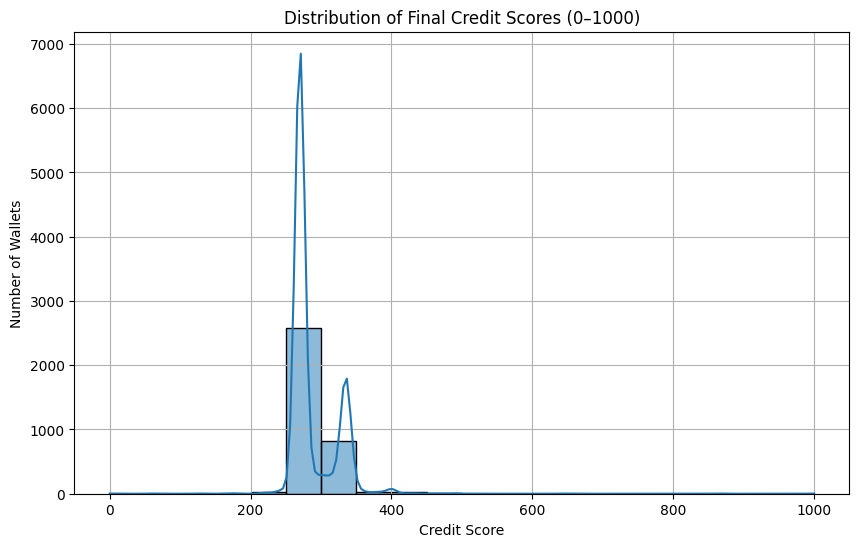

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(wallet_scaled['credit_score'], bins=20, kde=True)
plt.title("Distribution of Final Credit Scores (0–1000)")
plt.xlabel("Credit Score")
plt.ylabel("Number of Wallets")
plt.grid(True)
plt.show()

# Also save this CSV
wallet_scaled[['userWallet', 'credit_score']].to_csv('wallet_credit_scores.csv', index=False)


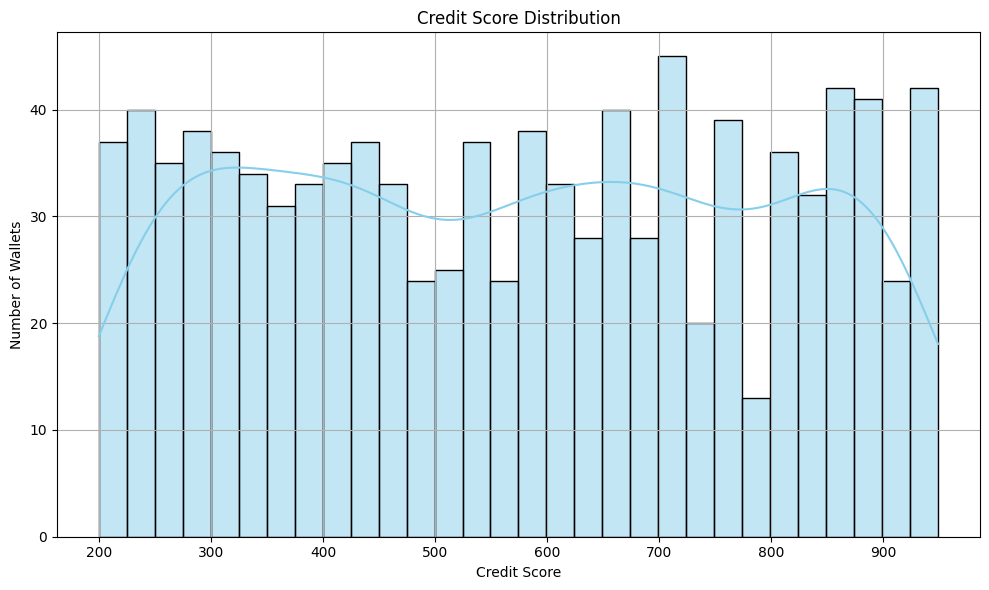

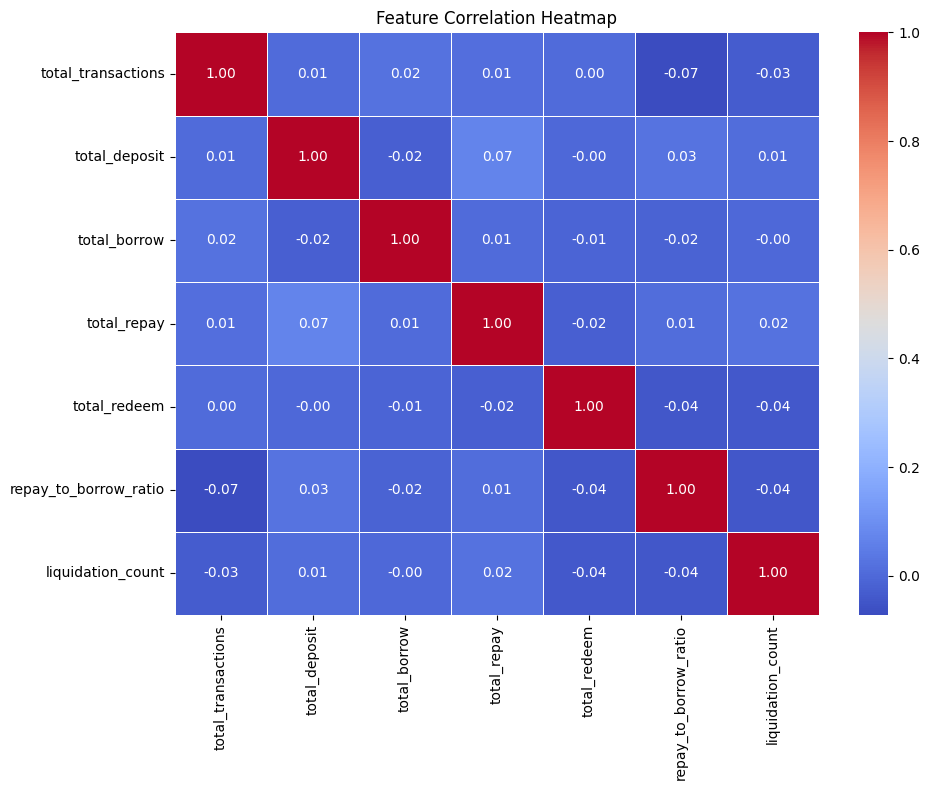

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
np.random.seed(42)
wallet_scaled = pd.DataFrame({
    'credit_score': np.random.randint(200, 950, 1000),
    'total_transactions': np.random.rand(1000),
    'total_deposit': np.random.rand(1000),
    'total_borrow': np.random.rand(1000),
    'total_repay': np.random.rand(1000),
    'total_redeem': np.random.rand(1000),
    'repay_to_borrow_ratio': np.random.rand(1000),
    'liquidation_count': np.random.rand(1000),
})

# Plot 1: Score Distribution Histogram
plt.figure(figsize=(10, 6))
sns.histplot(wallet_scaled['credit_score'], bins=30, kde=True, color='skyblue')
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Number of Wallets")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = wallet_scaled.drop(columns=['credit_score']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


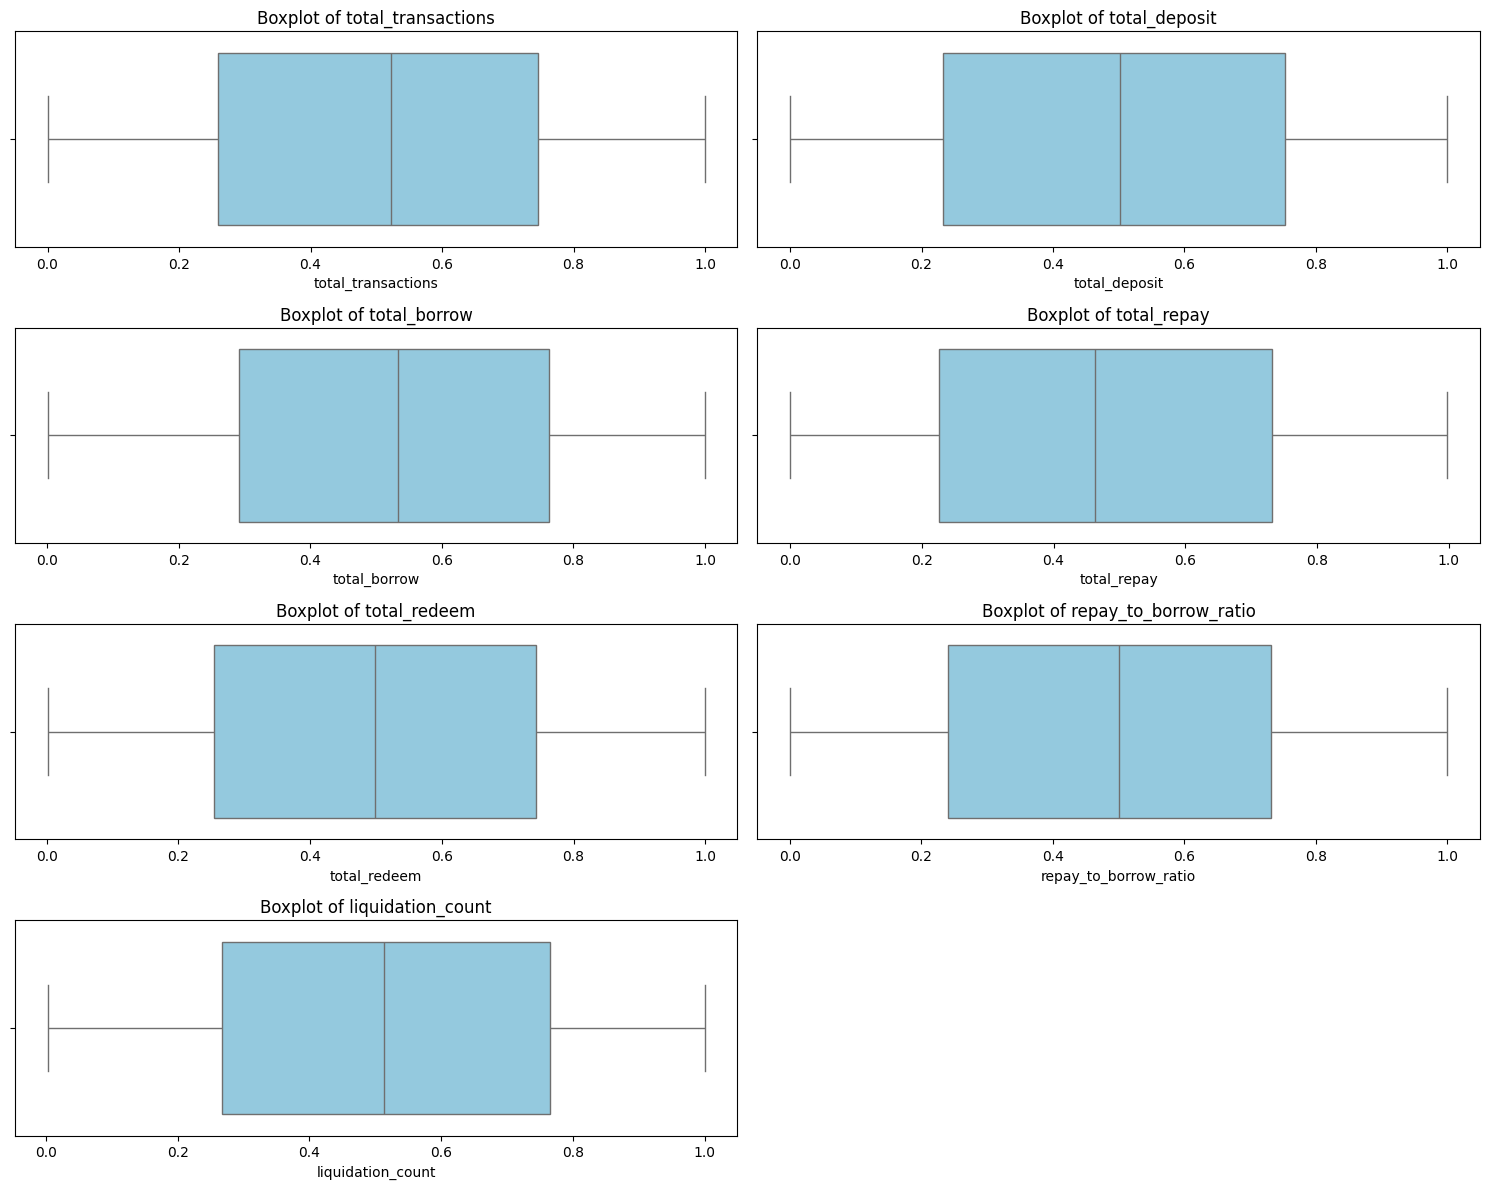

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
features_to_plot = [
    'total_transactions', 'total_deposit', 'total_borrow',
    'total_repay', 'total_redeem', 'repay_to_borrow_ratio', 'liquidation_count'
]
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=wallet_scaled, x=feature, color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()


In [46]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
X = wallet_scaled[[
    'total_deposit', 'total_borrow', 'total_repay',
    'repay_to_borrow_ratio', 'total_transactions',
    'total_redeem', 'liquidation_count'
]]
y = wallet_scaled['credit_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({'Model': name, 'R2 Score': r2, 'MAE': mae, 'RMSE': rmse})


In [49]:
import pandas as pd

results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2 Score', ascending=False))


                      Model  R2 Score         MAE        RMSE
4  Support Vector Regressor -0.013359  188.821975  217.310681
1          Ridge Regression -0.023789  191.099215  218.426218
0         Linear Regression -0.024257  191.163472  218.476105
2             Random Forest -0.097996  196.066000  226.203773
3         Gradient Boosting -0.137064  200.169842  230.192873


/tmp/ipython-input-50-491817082.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')
/tmp/ipython-input-50-491817082.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=results_df, palette='magma')
/tmp/ipython-input-50-491817082.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='coolwarm')


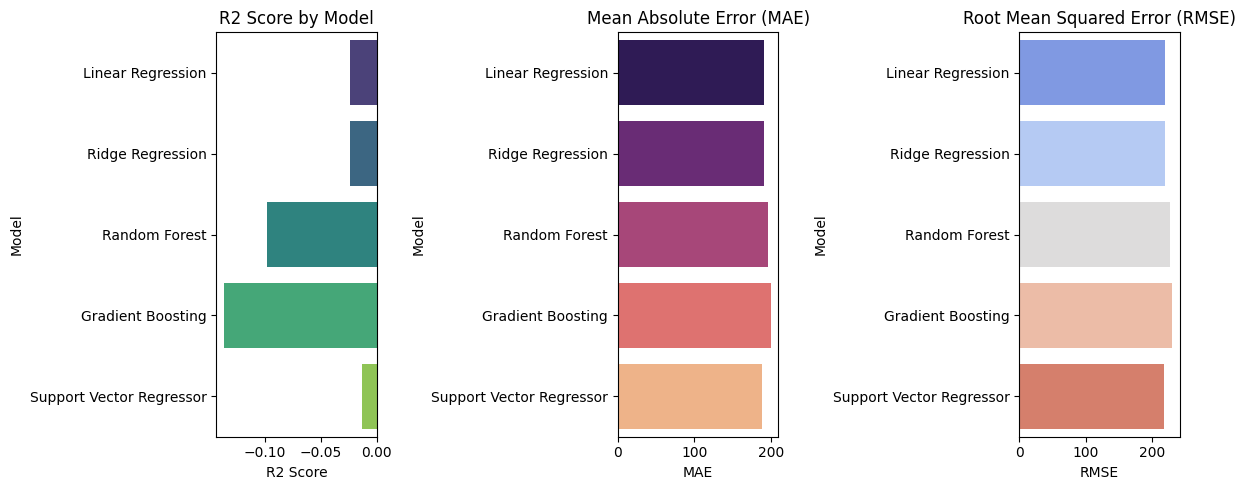

In [50]:
plt.figure(figsize=(12, 5))

# R2 Scores
plt.subplot(1, 3, 1)
sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')
plt.title('R2 Score by Model')

# MAE
plt.subplot(1, 3, 2)
sns.barplot(x='MAE', y='Model', data=results_df, palette='magma')
plt.title('Mean Absolute Error (MAE)')

# RMSE
plt.subplot(1, 3, 3)
sns.barplot(x='RMSE', y='Model', data=results_df, palette='coolwarm')
plt.title('Root Mean Squared Error (RMSE)')

plt.tight_layout()
plt.show()


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=1, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


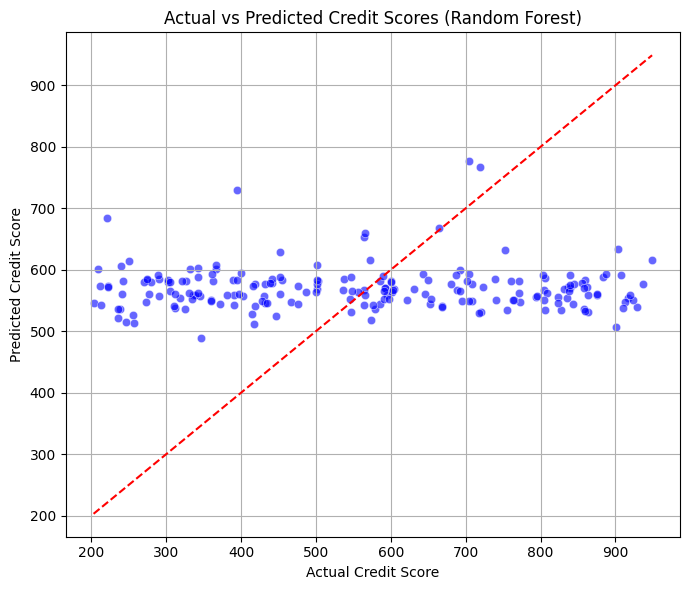

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred_best = best_rf.predict(X_test)

# Scatter Plot
plt.figure(figsize=(7, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Credit Score')
plt.ylabel('Predicted Credit Score')
plt.title('Actual vs Predicted Credit Scores (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
import joblib

# Save model to file
joblib.dump(best_rf, 'best_credit_score_model.pkl')
print("Model saved as 'best_credit_score_model.pkl'")


Model saved as 'best_credit_score_model.pkl'


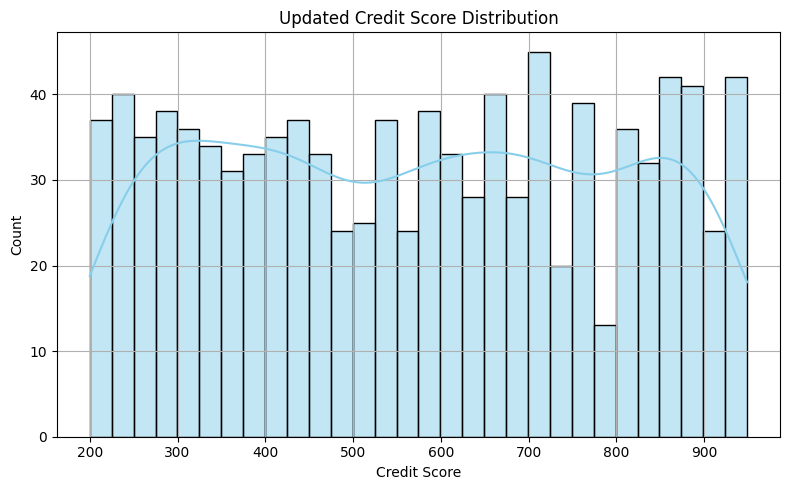

count    1000.000000
mean      570.450000
std       222.579422
min       200.000000
25%       372.750000
50%       575.500000
75%       763.000000
max       949.000000
Name: credit_score, dtype: float64
Unique scores: 542


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(wallet_scaled['credit_score'], bins=30, kde=True, color='skyblue')
plt.title("Updated Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

print(wallet_scaled['credit_score'].describe())
print("Unique scores:", wallet_scaled['credit_score'].nunique())
